In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


## import the data and make a dataframe

In [2]:
suicide_data = pd.read_csv('SuicideBD-dataset.csv')
df = suicide_data.copy()
df.set_index('id', inplace=True)
pd.options.display.max_columns = None

In [3]:
df.head(3)

,full_name,age_group,age,gender,profession_group,religion,hometown,latitude,longitude,reason,reason_description,time,method,data_source,suicide_date,unix_time,temperature,feels_like,temp_min,temp_max,air_pressure,air_humidity,wind_speed,wind_deg,clouds_sky,weather_main,weather_description
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Parvez,Teen,22,Male,Worker,Muslim,Brahmanbaria,23.964142,91.118301,Harassment,Assault,afternoon,NaN,https://www.dhakatribune.com/bangladesh/nation...,30/10/20,1604016000,299.15,302.86,299.15,299.15,1008,83,2.10,320,40,Haze,haze
1,Alhaj Uddin,Teen,20,Male,NaN,Muslim,Sylhet,24.894930,91.868706,Relatiohship problem,Failed love relationship,Night,Hanging,https://www.dhakatribune.com/bangladesh/nation...,4/11/2020,1604448000,295.57,299.17,295.57,295.57,1012,96,1.39,116,33,Clouds,scattered clouds
2,Priti Akter,Teen,14,Female,Student,Muslim,Manikganj,23.861650,90.000320,NaN,NaN,Morning,Hanging,https://www.dhakatribune.com/bangladesh/nation...,25/9/20,1600992000,301.15,304.33,301.15,301.15,1004,78,3.60,190,75,Drizzle,drizzle


## data cleaning

In [4]:
# delete any duplicate row?
df = df.drop_duplicates()

remove unnecessary column from dataframe

In [5]:
# delete unnecessary column for analysis
df.drop(['reason_description','data_source','temperature','feels_like','temp_min','temp_max','air_pressure','air_humidity','wind_speed','wind_deg','clouds_sky','weather_description'], axis=1, inplace=True )

In [6]:
df.head()

,full_name,age_group,age,gender,profession_group,religion,hometown,latitude,longitude,reason,time,method,suicide_date,unix_time,weather_main
id,,,,,,,,,,,,,,,
0,Parvez,Teen,22,Male,Worker,Muslim,Brahmanbaria,23.964142,91.118301,Harassment,afternoon,NaN,30/10/20,1604016000,Haze
1,Alhaj Uddin,Teen,20,Male,NaN,Muslim,Sylhet,24.894930,91.868706,Relatiohship problem,Night,Hanging,4/11/2020,1604448000,Clouds
2,Priti Akter,Teen,14,Female,Student,Muslim,Manikganj,23.861650,90.000320,NaN,Morning,Hanging,25/9/20,1600992000,Drizzle
3,Acchia Akhter,NaN,NaN,Female,Student,Muslim,Bogra,24.850980,89.371080,Relatiohship problem,Morning,Hanging,24/9/20,1600905600,Rain
4,Dilshad Nahar,Teen,18,Female,Student,Muslim,Dhaka,23.810331,90.412521,NaN,Night,Hanging,18/9/20,1600387200,Haze


make upper-case

In [7]:
# make all upper case letter to lower for better analysis
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.head(5)

/tmp/ipykernel_172612/2985407915.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,full_name,age_group,age,gender,profession_group,religion,hometown,latitude,longitude,reason,time,method,suicide_date,unix_time,weather_main
id,,,,,,,,,,,,,,,
0,parvez,teen,22,male,worker,muslim,brahmanbaria,23.964142,91.118301,harassment,afternoon,NaN,30/10/20,1604016000,haze
1,alhaj uddin,teen,20,male,NaN,muslim,sylhet,24.894930,91.868706,relatiohship problem,night,hanging,4/11/2020,1604448000,clouds
2,priti akter,teen,14,female,student,muslim,manikganj,23.861650,90.000320,NaN,morning,hanging,25/9/20,1600992000,drizzle
3,acchia akhter,NaN,NaN,female,student,muslim,bogra,24.850980,89.371080,relatiohship problem,morning,hanging,24/9/20,1600905600,rain
4,dilshad nahar,teen,18,female,student,muslim,dhaka,23.810331,90.412521,NaN,night,hanging,18/9/20,1600387200,haze


create new age group

In [8]:
# convert age to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')


In [9]:
# make new age group

bins = [1, 20, 40, 60, 75, 120]
labels = ['teen', 'young_adult', 'middle_age', 'young_old', 'old_old']

df['age_group2'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [10]:
# drop old age group and name age_group2 to age group
df.drop('age_group',axis=1,inplace=True)


In [11]:
df['age_group'] = df['age_group2']

In [12]:
df.drop('age_group2',axis=1,inplace=True)

clean 'profession_group' column

In [13]:
df.head(5)

,full_name,age,gender,profession_group,religion,hometown,latitude,longitude,reason,time,method,suicide_date,unix_time,weather_main,age_group
id,,,,,,,,,,,,,,,
0,parvez,22.0,male,worker,muslim,brahmanbaria,23.964142,91.118301,harassment,afternoon,NaN,30/10/20,1604016000,haze,young_adult
1,alhaj uddin,20.0,male,NaN,muslim,sylhet,24.894930,91.868706,relatiohship problem,night,hanging,4/11/2020,1604448000,clouds,young_adult
2,priti akter,14.0,female,student,muslim,manikganj,23.861650,90.000320,NaN,morning,hanging,25/9/20,1600992000,drizzle,teen
3,acchia akhter,NaN,female,student,muslim,bogra,24.850980,89.371080,relatiohship problem,morning,hanging,24/9/20,1600905600,rain,NaN
4,dilshad nahar,18.0,female,student,muslim,dhaka,23.810331,90.412521,NaN,night,hanging,18/9/20,1600387200,haze,teen


In [14]:
df['profession_group'].unique()

array(['worker', nan, 'student', 'housewife', 'service holder',
       'day labourer', 'teacher', 'farmer', 'musician', 'saint',
       'day laborer', 'gambler', 'null', 'actor', 'houswife', 'doctor',
       'businessman', 'engineer', 'stportsman', 'spotsman', 'day-laborer'],
      dtype=object)

In [15]:
df['profession_group'] = df['profession_group'].replace(
    {
        'day laborer':'day-laborer',
        'day labourer':'day-laborer',
        'spotsman':'sportsman',
        'stportsman':'sportsman',
        'houswife':'housewife',
    }
)

In [16]:
df['profession_group'].unique()

array(['worker', nan, 'student', 'housewife', 'service holder',
       'day-laborer', 'teacher', 'farmer', 'musician', 'saint', 'gambler',
       'null', 'actor', 'doctor', 'businessman', 'engineer', 'sportsman'],
      dtype=object)

new column from unix_time

In [17]:
df.head(3)

,full_name,age,gender,profession_group,religion,hometown,latitude,longitude,reason,time,method,suicide_date,unix_time,weather_main,age_group
id,,,,,,,,,,,,,,,
0,parvez,22.0,male,worker,muslim,brahmanbaria,23.964142,91.118301,harassment,afternoon,NaN,30/10/20,1604016000,haze,young_adult
1,alhaj uddin,20.0,male,NaN,muslim,sylhet,24.894930,91.868706,relatiohship problem,night,hanging,4/11/2020,1604448000,clouds,young_adult
2,priti akter,14.0,female,student,muslim,manikganj,23.861650,90.000320,NaN,morning,hanging,25/9/20,1600992000,drizzle,teen


In [18]:
df['time_stamp'] = pd.to_datetime(df['unix_time'], unit='s')

In [19]:
df.drop(['suicide_date','unix_time'],axis=1,inplace=True)

In [20]:
df.rename(columns={'time_stamp':'suicide_date'},inplace=True)

In [21]:
df.head()

,full_name,age,gender,profession_group,religion,hometown,latitude,longitude,reason,time,method,weather_main,age_group,suicide_date
id,,,,,,,,,,,,,,
0,parvez,22.0,male,worker,muslim,brahmanbaria,23.964142,91.118301,harassment,afternoon,NaN,haze,young_adult,2020-10-30
1,alhaj uddin,20.0,male,NaN,muslim,sylhet,24.894930,91.868706,relatiohship problem,night,hanging,clouds,young_adult,2020-11-04
2,priti akter,14.0,female,student,muslim,manikganj,23.861650,90.000320,NaN,morning,hanging,drizzle,teen,2020-09-25
3,acchia akhter,NaN,female,student,muslim,bogra,24.850980,89.371080,relatiohship problem,morning,hanging,rain,NaN,2020-09-24
4,dilshad nahar,18.0,female,student,muslim,dhaka,23.810331,90.412521,NaN,night,hanging,haze,teen,2020-09-18


In [22]:
df2 = df.copy()

## Analysis & Visualization

### Demographic Analysis

In [23]:
# Age group Analysis
Age_Group = df2['age_group'].value_counts().reset_index()
Age_Group = pd.DataFrame(Age_Group, columns=['age_group','count'])
Age_Group

,age_group,count
0,young_adult,285
1,teen,247
2,middle_age,82
3,young_old,30
4,old_old,5


In [24]:
fig = px.bar(Age_Group, x='age_group', y='count', 
             title='Age Group Distribution', 
             color='age_group',
             labels={'age_group': 'Age Group', 'count': 'Count'},
             template='plotly_dark')
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

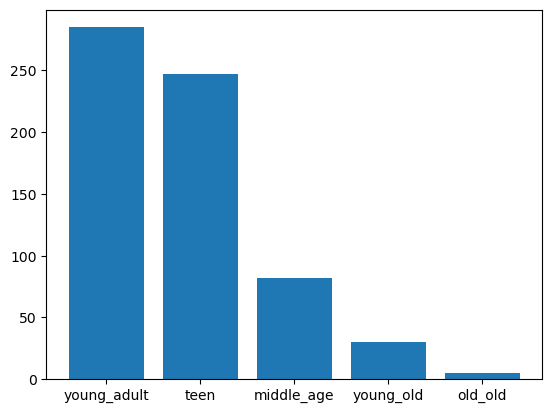

In [26]:
plt.bar(Age_Group['age_group'],Age_Group['count'])
plt.show